In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Experiment
folder = 'fig/lag4/DFM_MP_ObsShock'

# Import data
data = np.genfromtxt(folder + '/tradeoff_best.csv', delimiter=',')
h = data[0,1:].flatten()
w = data[1:,0].flatten()
z = data[1:,1:]

In [15]:
# Define colors and hatches

methods = ['SVAR', 'BC SVAR', 'BVAR', 'LP', 'Pen LP', 'VAR avg'] # Method names
lines = np.array([[0.9290,    0.6940,    0.1250],
                  [0.4940,    0.1840,    0.5560],
                  [0,         0.4470,    0.7410],
                  [0.8500,    0.3250,    0.0980],
                  [0.4660,    0.6740,    0.1880],
                  [0.3010,    0.7450,    0.9330]]) # Colors for each method
hatches = ['', '-', '.', '/', 'x', 'o'] # Hatch pattern for each method

In [16]:
# Create colormap

numl = lines.shape[0]
cmap = mpl.colors.ListedColormap(lines)
norm = mpl.colors.BoundaryNorm(np.arange(0.5,numl+1), cmap.N)

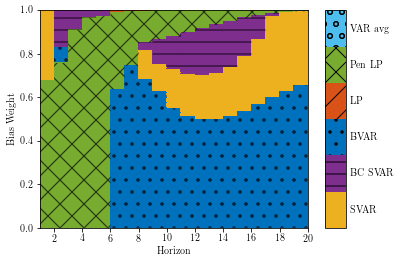

In [17]:
# Figure

mpl.rcParams.update({"text.usetex": True, "font.family": "serif"}) # Tex titles
plt.rc('text', usetex=True)

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()

cs = ax1.pcolormesh(h, w, z, cmap=cmap, norm=norm) # Plot with colored regions

for i in range(numl):
    zm = np.ma.masked_not_equal(z, i+1)
    ax1.pcolor(h, w, zm, hatch=hatches[i], alpha=0.) # Add hatch patterns one at a time

cp = ax2.contourf(h, w, z, levels=np.arange(numl+1), cmap=cmap, norm=norm, hatches=hatches)
# Hidden contour plot only used for the legend

cbar = fig1.colorbar(cp, ticks=np.arange(numl)+0.5, aspect=10) # Legend
cbar.ax.set_yticklabels(methods)
cbar.ax.tick_params(size=0)

plt.close(fig2) # Close the contour plot

plt.xticks(np.arange(2,np.amax(h)+1,2))
plt.xlabel('Horizon')
plt.ylabel('Bias Weight')

plt.savefig(folder + '/tradeoff_best.eps') # Save figure
plt.savefig(folder + '/tradeoff_best.png', dpi=200)